In [2]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, mean_squared_error
import xgboost as xgb

In [3]:
df = pd.read_csv("/Users/haaland/Desktop/jupyter/car_price_prediction.csv")

## Basic information

In [4]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [6]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


##  ETL

缺失值处理

把levy这一列的'-'都转化成为'0'，然后再转换成浮点型为了后续计算。

In [7]:
df['Levy'] = df['Levy'].replace('-', 0)

In [8]:
df['Levy'] = df['Levy'].astype('float64')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  float64
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [10]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,0.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


修改变量名

一开始是列名是Prod. year，为了方便计算以及数据更清晰，用今年的年份减去生产年限来作为汽车使用的年限，并更改列名为Age。

In [11]:
df.rename(columns={'Prod. year': 'Age'}, inplace=True)

In [12]:
df['Age'] = 2024 - df['Age']

In [13]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Age,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399.0,LEXUS,RX 450,14,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,13,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,0.0,HONDA,FIT,18,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862.0,FORD,Escape,13,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446.0,HONDA,FIT,10,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


修改变量类型

将变量修改为bool类型以方便后续计算

In [14]:
df['Leather interior'] = df['Leather interior'].replace({'Yes': 1, 'No': 0})

In [15]:
df['Leather interior'] = df['Leather interior'].astype(bool)

In [16]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Age,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399.0,LEXUS,RX 450,14,Jeep,True,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,13,Jeep,False,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,0.0,HONDA,FIT,18,Hatchback,False,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862.0,FORD,Escape,13,Jeep,True,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446.0,HONDA,FIT,10,Hatchback,True,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


删除重复数据

In [17]:
df.duplicated().sum()

313

In [18]:
df = df.drop_duplicates()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              18924 non-null  float64
 3   Manufacturer      18924 non-null  object 
 4   Model             18924 non-null  object 
 5   Age               18924 non-null  int64  
 6   Category          18924 non-null  object 
 7   Leather interior  18924 non-null  bool   
 8   Fuel type         18924 non-null  object 
 9   Engine volume     18924 non-null  object 
 10  Mileage           18924 non-null  object 
 11  Cylinders         18924 non-null  float64
 12  Gear box type     18924 non-null  object 
 13  Drive wheels      18924 non-null  object 
 14  Doors             18924 non-null  object 
 15  Wheel             18924 non-null  object 
 16  Color             18924 non-null  object 
 17

去掉Mileage数据中的单位来方便计算。然后改变数据类型为float

In [20]:
df['Mileage'] = df['Mileage'].str.strip('km')

In [21]:
df['Mileage'] = df['Mileage'].astype('int')

In [22]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Age,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399.0,LEXUS,RX 450,14,Jeep,True,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,13,Jeep,False,Petrol,3,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,0.0,HONDA,FIT,18,Hatchback,False,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862.0,FORD,Escape,13,Jeep,True,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446.0,HONDA,FIT,10,Hatchback,True,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4


超过1000000的Mileage可能为异常值，删除带有异常值的列

In [23]:
print(df['Mileage'].describe())

count    1.892400e+04
mean     1.555373e+06
std      4.880221e+07
min      0.000000e+00
25%      7.019575e+04
50%      1.264000e+05
75%      1.891198e+05
max      2.147484e+09
Name: Mileage, dtype: float64


In [24]:
df = df[df['Mileage'] <= 1000000]

In [25]:
print(df['Mileage'].describe())

count      18851.000000
mean      140171.950188
std       103053.996056
min            0.000000
25%        70000.000000
50%       126000.000000
75%       188080.500000
max      1000000.000000
Name: Mileage, dtype: float64


Engine volume将所有带Turbo的取消，改变列名的数据类型为float。然后添加新的一列，作用是是否带turbo。列名为Turbo设置为bool类型。1表示有Turbo，0表示没有。

In [26]:
df['Turbo'] = df['Engine volume'].str.contains('Turbo').astype(int)

In [27]:
df['Engine volume'] = df['Engine volume'].str.replace(' Turbo', '')

In [28]:
df['Engine volume'] = df['Engine volume'].astype('float64')

In [29]:
df['Engine volume'].unique()

array([ 3.5,  3. ,  1.3,  2.5,  2. ,  1.8,  2.4,  4. ,  1.6,  3.3,  2.2,
        4.7,  1.5,  4.4,  1.4,  3.6,  2.3,  5.5,  2.8,  3.2,  3.8,  4.6,
        1.2,  5. ,  1.7,  2.9,  0.5,  1.9,  2.7,  4.8,  5.3,  0.4,  1.1,
        2.1,  0.7,  5.4,  3.7,  1. ,  2.6,  0.8,  0.2,  5.7,  6.7,  6.2,
        3.4,  6.3,  4.3,  4.2,  0. , 20. ,  0.3,  5.9,  5.6,  6. ,  0.6,
        6.8,  4.5,  7.3,  0.1,  3.1,  6.4,  3.9,  0.9,  5.2,  5.8])

In [30]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Age,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,45654403,13328,1399.0,LEXUS,RX 450,14,Jeep,True,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,0
1,44731507,16621,1018.0,CHEVROLET,Equinox,13,Jeep,False,Petrol,3.0,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,0
2,45774419,8467,0.0,HONDA,FIT,18,Hatchback,False,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2,0
3,45769185,3607,862.0,FORD,Escape,13,Jeep,True,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0,0
4,45809263,11726,446.0,HONDA,FIT,10,Hatchback,True,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18851 entries, 0 to 19236
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18851 non-null  int64  
 1   Price             18851 non-null  int64  
 2   Levy              18851 non-null  float64
 3   Manufacturer      18851 non-null  object 
 4   Model             18851 non-null  object 
 5   Age               18851 non-null  int64  
 6   Category          18851 non-null  object 
 7   Leather interior  18851 non-null  bool   
 8   Fuel type         18851 non-null  object 
 9   Engine volume     18851 non-null  float64
 10  Mileage           18851 non-null  int64  
 11  Cylinders         18851 non-null  float64
 12  Gear box type     18851 non-null  object 
 13  Drive wheels      18851 non-null  object 
 14  Doors             18851 non-null  object 
 15  Wheel             18851 non-null  object 
 16  Color             18851 non-null  object 
 17

将Doors这一列的数据简化，以便更清楚的进行运算。

In [32]:
df['Doors'] = df['Doors'].replace('04-May', 4)

In [33]:
df['Doors'] = df['Doors'].replace('02-Mar', 2)

In [34]:
df['Doors'] = df['Doors'].replace('>5', 6)

In [35]:
df['Doors'] = df['Doors'].astype('int')

In [36]:
df['Doors'].value_counts()

Doors
4    17968
2      762
6      121
Name: count, dtype: int64

In [37]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Age,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,45654403,13328,1399.0,LEXUS,RX 450,14,Jeep,True,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,0
1,44731507,16621,1018.0,CHEVROLET,Equinox,13,Jeep,False,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8,0
2,45774419,8467,0.0,HONDA,FIT,18,Hatchback,False,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2,0
3,45769185,3607,862.0,FORD,Escape,13,Jeep,True,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0,0
4,45809263,11726,446.0,HONDA,FIT,10,Hatchback,True,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,0


删除ID列，因为没用。

In [38]:
df = df.drop('ID', axis=1)

In [39]:
df.head()

,Price,Levy,Manufacturer,Model,Age,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,13328,1399.0,LEXUS,RX 450,14,Jeep,True,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,0
1,16621,1018.0,CHEVROLET,Equinox,13,Jeep,False,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8,0
2,8467,0.0,HONDA,FIT,18,Hatchback,False,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2,0
3,3607,862.0,FORD,Escape,13,Jeep,True,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0,0
4,11726,446.0,HONDA,FIT,10,Hatchback,True,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,0


大规模处理异常值

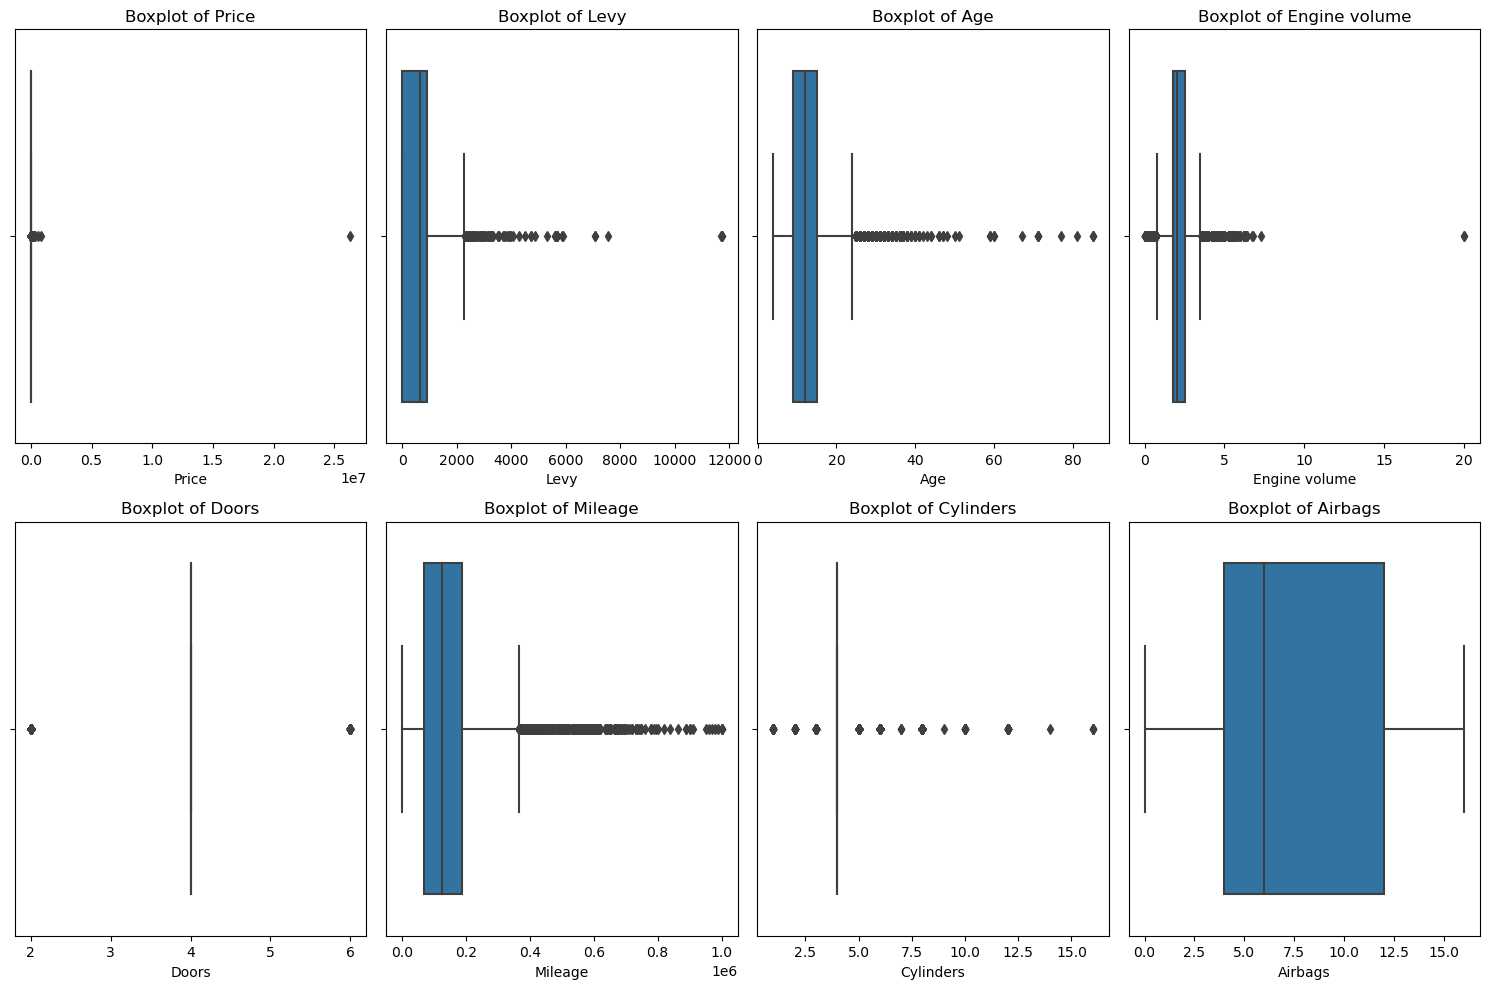

In [40]:
detect_columns = ['Price', 'Levy', 'Age', 'Engine volume', 'Doors', 'Mileage', 'Cylinders', 'Airbags']

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Create a boxplot for each specified column
for index, column in enumerate(detect_columns, 1):
    plt.subplot(2, 4, index)  # Creates subplots in a 2x4 grid
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

# Adjust layout for better fit and display the plot
plt.tight_layout()
plt.show()


我发现'Doors','Cylinders', 'Airbags'没有异常值

In [41]:
detect_columns_2 = ['Price', 'Levy', 'Age', 'Engine volume', 'Mileage']
outliers_dict = {}

for col in detect_columns_2:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # 计算异常值的边界
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # 检测异常值
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    # 保存异常值的信息
    outliers_dict[col] = outliers

# 输出每一列的异常值数量
for col, outlier_df in outliers_dict.items():
    print(f"列 '{col}' 的异常值数量为: {outlier_df.shape[0]}")


列 'Price' 的异常值数量为: 1035
列 'Levy' 的异常值数量为: 160
列 'Age' 的异常值数量为: 931
列 'Engine volume' 的异常值数量为: 1356
列 'Mileage' 的异常值数量为: 573


In [42]:
for col in detect_columns_2:
    # 计算每一列的第一四分位数和第三四分位数以及IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # 定义异常值的下界和上界
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # 将低于下界的值设为下界，将高于上界的值设为上界
    df[col] = df[col].clip(lower_bound, upper_bound)



In [43]:
outliers_dict = {}

for col in detect_columns_2:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # 计算异常值的边界
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # 检测异常值
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    # 保存异常值的信息
    outliers_dict[col] = outliers

# 输出每一列的异常值数量
for col, outlier_df in outliers_dict.items():
    print(f"列 '{col}' 的异常值数量为: {outlier_df.shape[0]}")

列 'Price' 的异常值数量为: 0
列 'Levy' 的异常值数量为: 0
列 'Age' 的异常值数量为: 0
列 'Engine volume' 的异常值数量为: 0
列 'Mileage' 的异常值数量为: 0


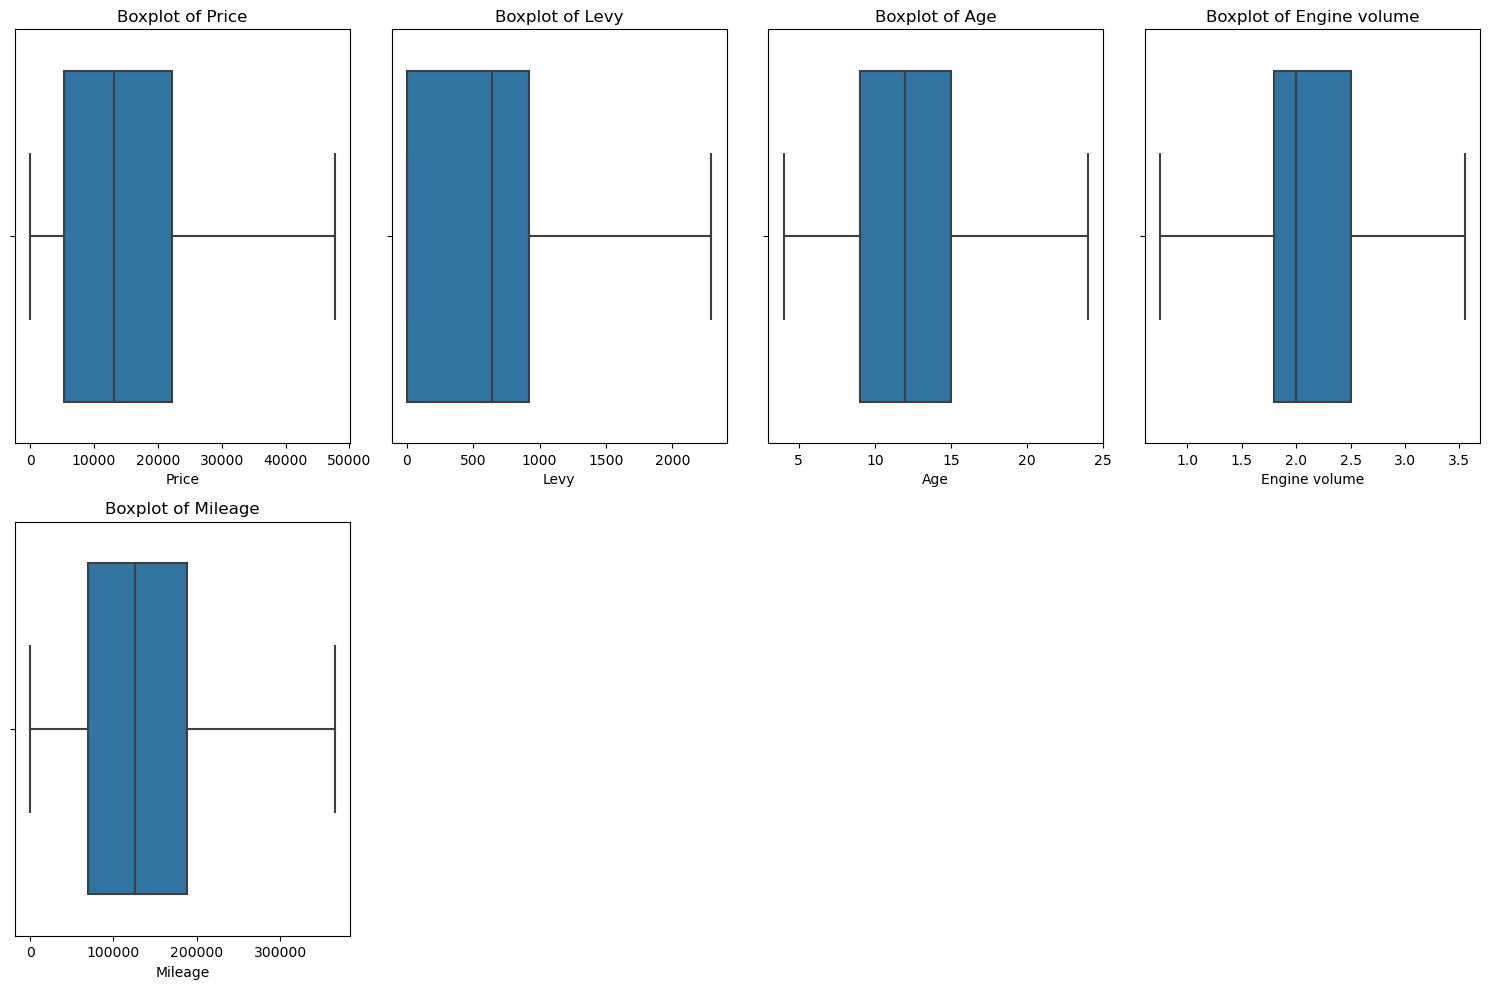

In [44]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Create a boxplot for each specified column
for index, column in enumerate(detect_columns_2, 1):
    plt.subplot(2, 4, index)  # Creates subplots in a 2x4 grid
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

# Adjust layout for better fit and display the plot
plt.tight_layout()
plt.show()

汇总

In [45]:
df_clean = df

## EDA

In [46]:
df_clean.head()

,Price,Levy,Manufacturer,Model,Age,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,13328.0,1399.0,LEXUS,RX 450,14,Jeep,True,Hybrid,3.5,186005.0,6.0,Automatic,4x4,4,Left wheel,Silver,12,0
1,16621.0,1018.0,CHEVROLET,Equinox,13,Jeep,False,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,4,Left wheel,Black,8,0
2,8467.0,0.0,HONDA,FIT,18,Hatchback,False,Petrol,1.3,200000.0,4.0,Variator,Front,4,Right-hand drive,Black,2,0
3,3607.0,862.0,FORD,Escape,13,Jeep,True,Hybrid,2.5,168966.0,4.0,Automatic,4x4,4,Left wheel,White,0,0
4,11726.0,446.0,HONDA,FIT,10,Hatchback,True,Petrol,1.3,91901.0,4.0,Automatic,Front,4,Left wheel,Silver,4,0


In [47]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18851 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18851 non-null  float64
 1   Levy              18851 non-null  float64
 2   Manufacturer      18851 non-null  object 
 3   Model             18851 non-null  object 
 4   Age               18851 non-null  int64  
 5   Category          18851 non-null  object 
 6   Leather interior  18851 non-null  bool   
 7   Fuel type         18851 non-null  object 
 8   Engine volume     18851 non-null  float64
 9   Mileage           18851 non-null  float64
 10  Cylinders         18851 non-null  float64
 11  Gear box type     18851 non-null  object 
 12  Drive wheels      18851 non-null  object 
 13  Doors             18851 non-null  int64  
 14  Wheel             18851 non-null  object 
 15  Color             18851 non-null  object 
 16  Airbags           18851 non-null  int64  
 17

Manufacturer

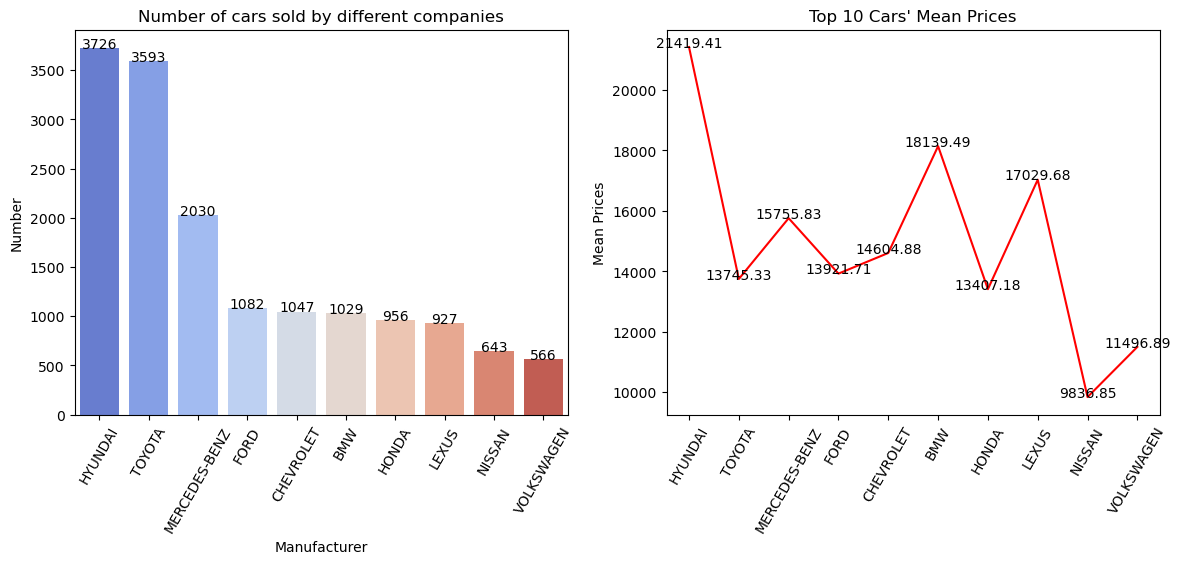

In [48]:
fig = plt.figure(figsize=(14, 5))

ax1 = fig.add_subplot(121)

# 统计不同汽车公司的数量（前十名）
Manufacturer = df_clean['Manufacturer'].value_counts().sort_values(ascending = False)[:10]
p = sns.barplot(x=Manufacturer.index, y=Manufacturer.values, palette="coolwarm")
plt.title('Number of cars sold by different companies')
plt.xticks(rotation=60)
plt.ylabel('Number')

# 在柱状图的每个柱子上方显示数量
for i in p.patches:
    height = i.get_height()
    ax1.text(i.get_x() + i.get_width() / 2., height, int(height), ha="center")
    
ax2 = fig.add_subplot(122)
mean = [df_clean[df_clean['Manufacturer']==i]['Price'].mean() for i in list(Manufacturer.index)]

plt.plot(Manufacturer.index, mean, color='r')
plt.xticks(rotation=60)
plt.ylabel('Mean Prices')
plt.title("Top 10 Cars' Mean Prices")

# 在柱状图的每个柱子上方显示数量
for i, value in enumerate(mean):
    ax2.text(i, value, f"{value:.2f}", ha='center') 
    
plt.show()


Levy

In [49]:
df_clean['Levy'].value_counts().head(10)

Levy
0.0       5643
765.0      482
891.0      453
639.0      403
640.0      398
781.0      294
1017.0     291
707.0      268
642.0      259
836.0      259
Name: count, dtype: int64

<Axes: xlabel='Levy', ylabel='Density'>

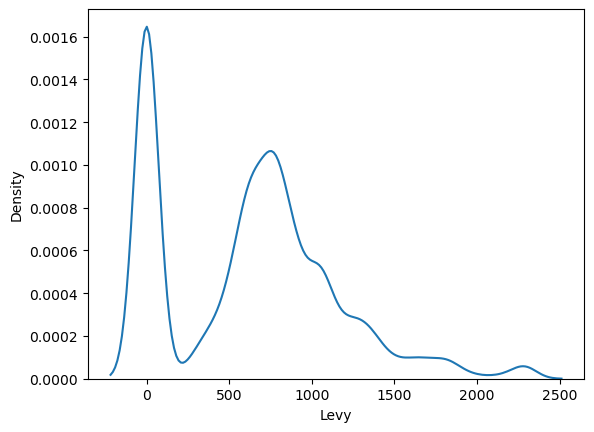

In [50]:
sns.kdeplot(df_clean['Levy'])

Engine Volume

In [51]:
df_clean['Engine volume'].value_counts()

Engine volume
2.00    4246
2.50    2331
1.80    1902
1.60    1553
1.50    1350
3.55    1273
3.50    1218
3.00    1085
2.40    1024
1.30     529
1.40     516
2.20     438
3.30     198
1.70     188
2.70     179
3.20     170
2.30     128
1.00     122
1.20     104
0.75      83
1.90      70
2.80      68
2.90      21
2.60      17
2.10      10
1.10       9
0.80       9
3.40       7
0.90       2
3.10       1
Name: count, dtype: int64

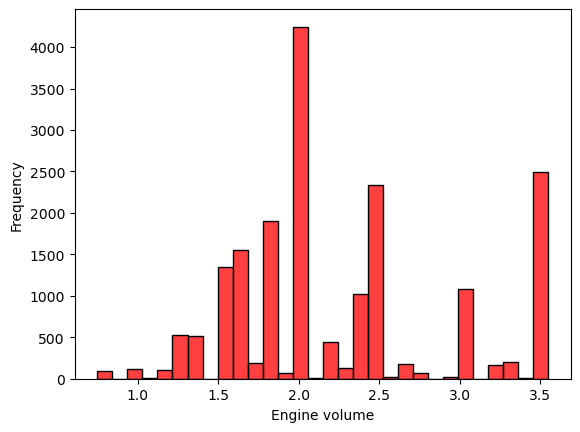

In [52]:
sns.histplot(df_clean['Engine volume'], color='red', bins=30)

plt.xlabel('Engine volume')
plt.ylabel('Frequency')
plt.show()

Age

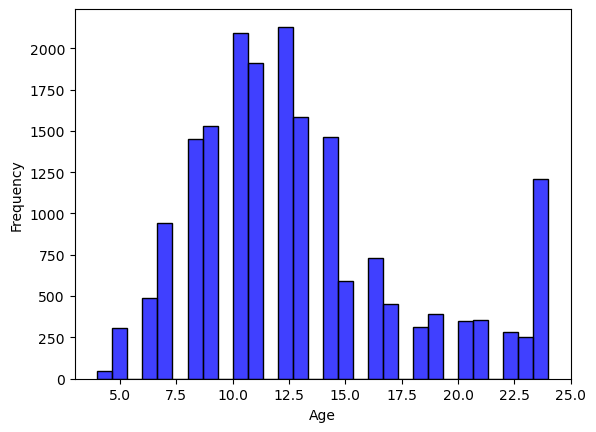

In [53]:
sns.histplot(df_clean['Age'], color='blue', bins=30)

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Category

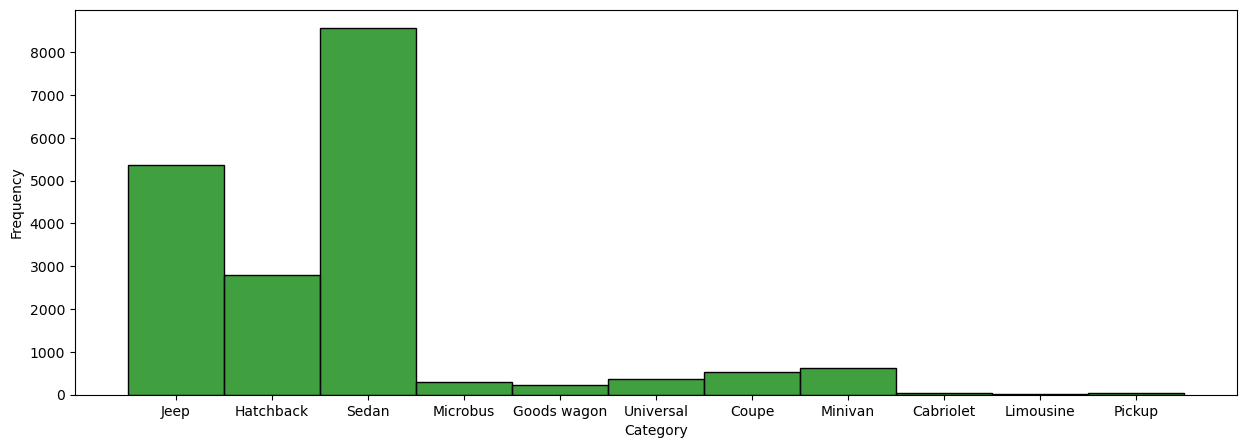

In [54]:
plt.figure(figsize=(15, 5))
sns.histplot(df_clean['Category'], color='green')

plt.xlabel('Category')
plt.ylabel('Frequency')

# Show the plot
plt.show()

Leather interior

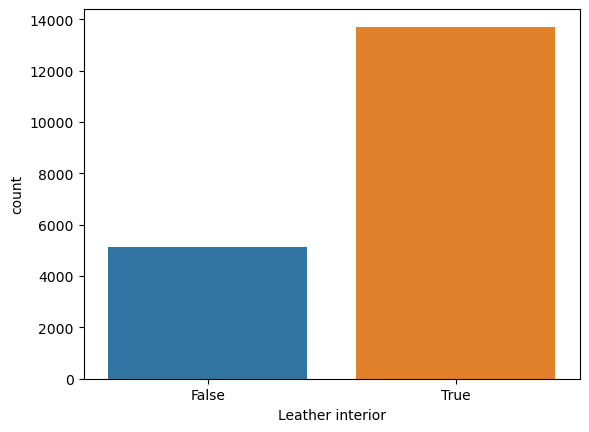

In [55]:
sns.countplot(x='Leather interior', data=df_clean)
plt.show()

Fuel type

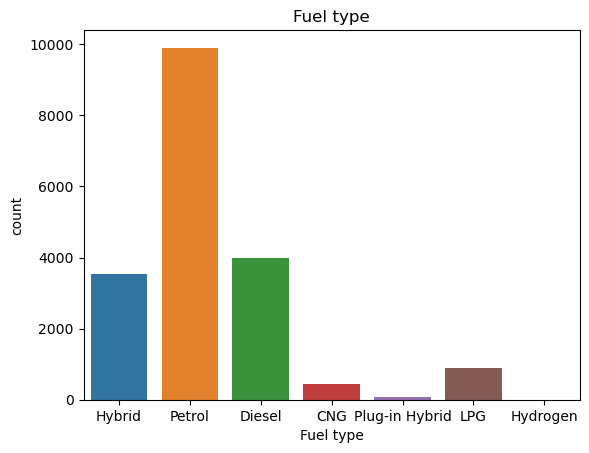

In [56]:
sns.countplot(x='Fuel type', data=df_clean)
plt.title("Fuel type")
plt.show()

Turbo

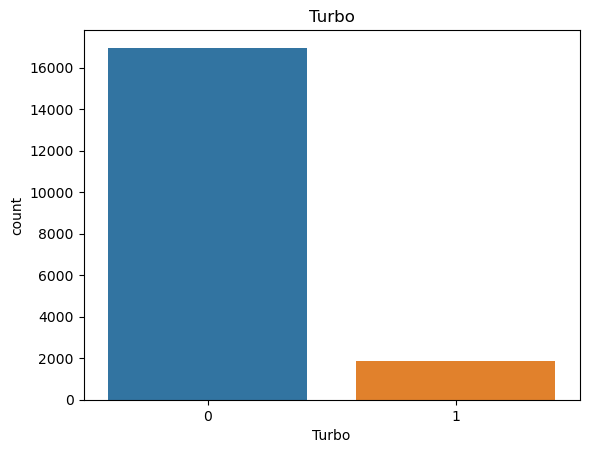

In [57]:
sns.countplot(x='Turbo', data=df_clean)
plt.title("Turbo")
plt.show()

In [58]:
print(df_clean['Mileage'].describe())

count     18851.000000
mean     136542.839757
std       89744.705566
min           0.000000
25%       70000.000000
50%      126000.000000
75%      188080.500000
max      365201.250000
Name: Mileage, dtype: float64


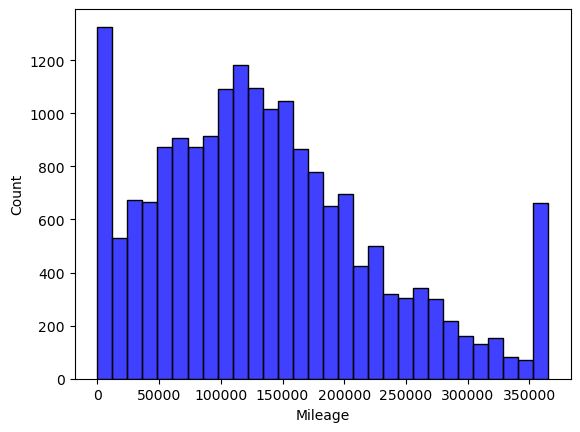

In [59]:
sns.histplot(df_clean['Mileage'], color='blue', bins=30)
plt.show()

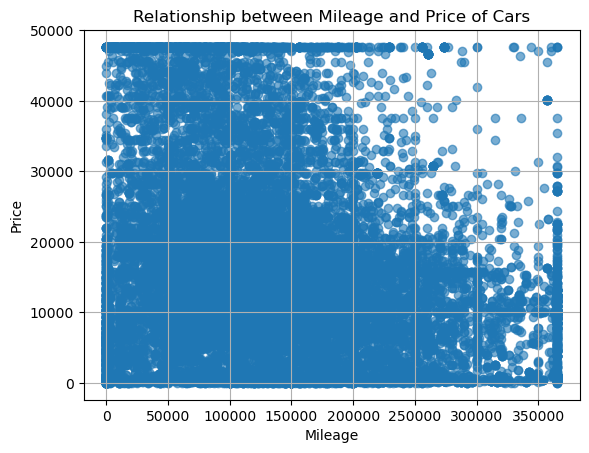

In [90]:
plt.scatter(df['Mileage'], df['Price'], alpha=0.6)
plt.title('Relationship between Mileage and Price of Cars')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.grid(True)
plt.show()

Gear box type

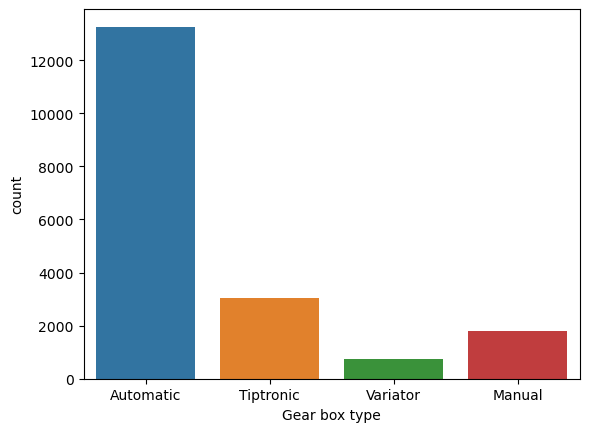

In [60]:
sns.countplot(x='Gear box type', data=df_clean)
plt.show()

Wheel

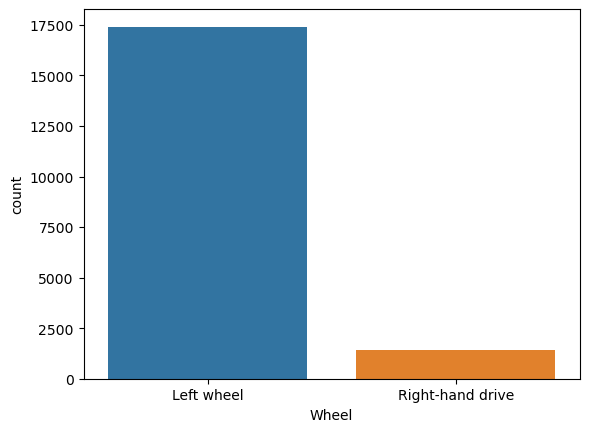

In [61]:
sns.countplot(x='Wheel', data=df_clean)
plt.show()

Cylinders

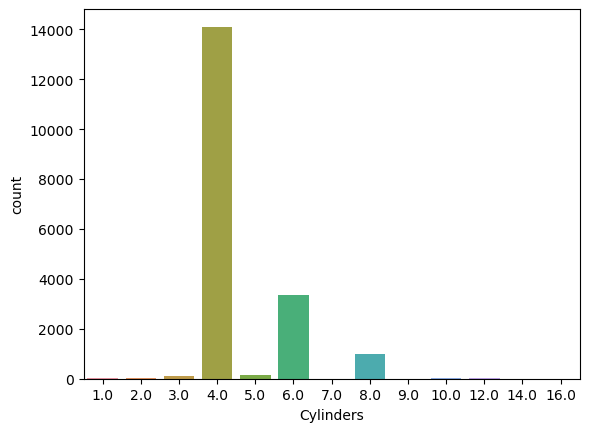

In [62]:
sns.countplot(x='Cylinders', data=df_clean)
plt.show()

### Color

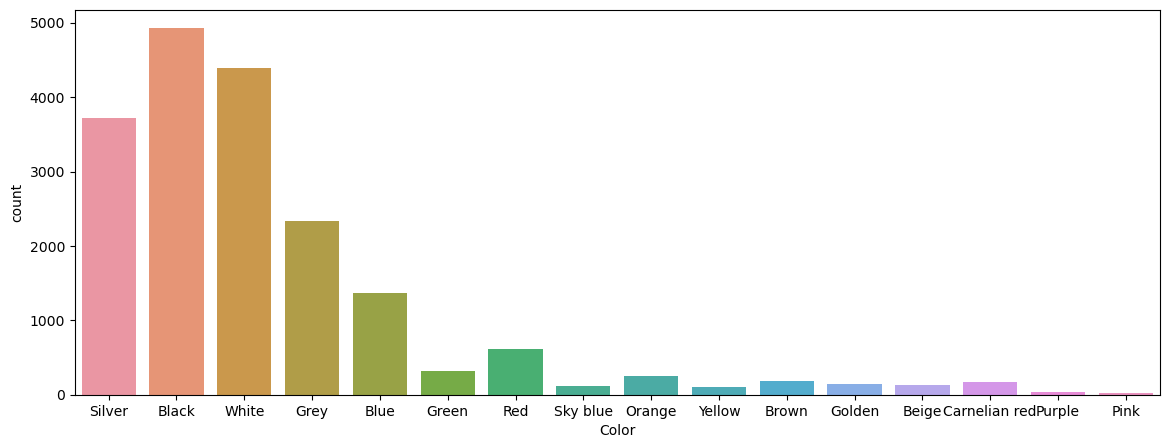

In [63]:
plt.figure(figsize=(14, 5))
sns.countplot(x='Color', data=df_clean)
plt.show()

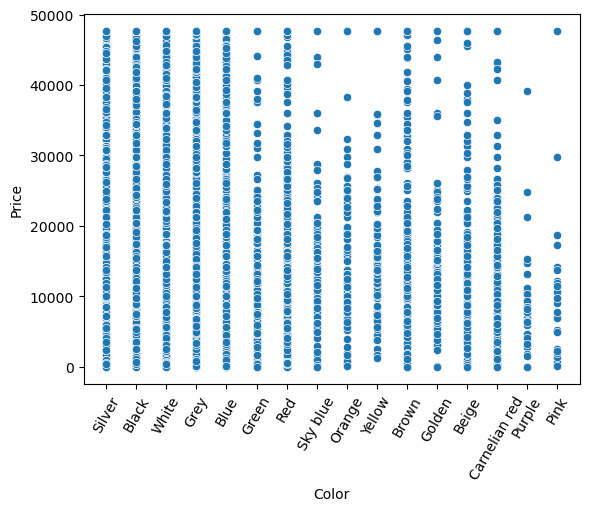

In [64]:
sns.scatterplot(x='Color', y='Price', data=df_clean)
plt.xticks(rotation=60)
plt.show()

In [65]:
df_clean = df_clean[~((df_clean['Color'].isin(['Pink', 'Purple'])) & (df_clean['Price'] > 20000))]

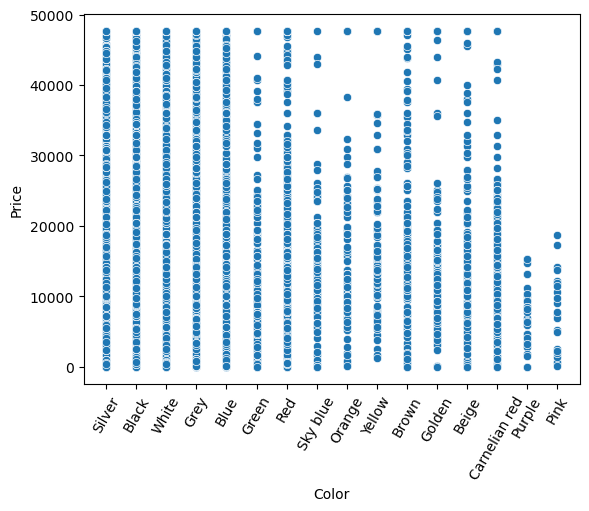

In [66]:
sns.scatterplot(x='Color', y='Price', data=df_clean)
plt.xticks(rotation=60)
plt.show()

Airbags

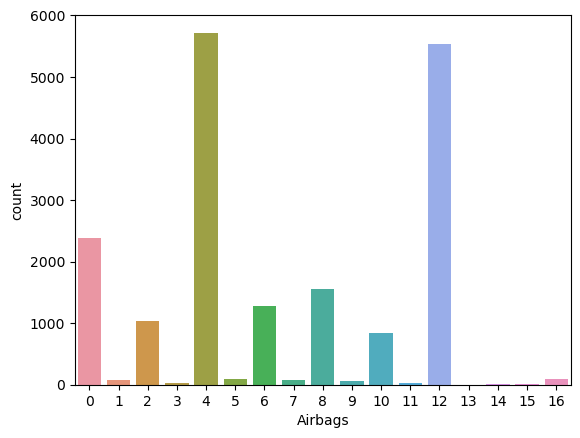

In [67]:
sns.countplot(x='Airbags', data=df_clean)
plt.show()

### corr

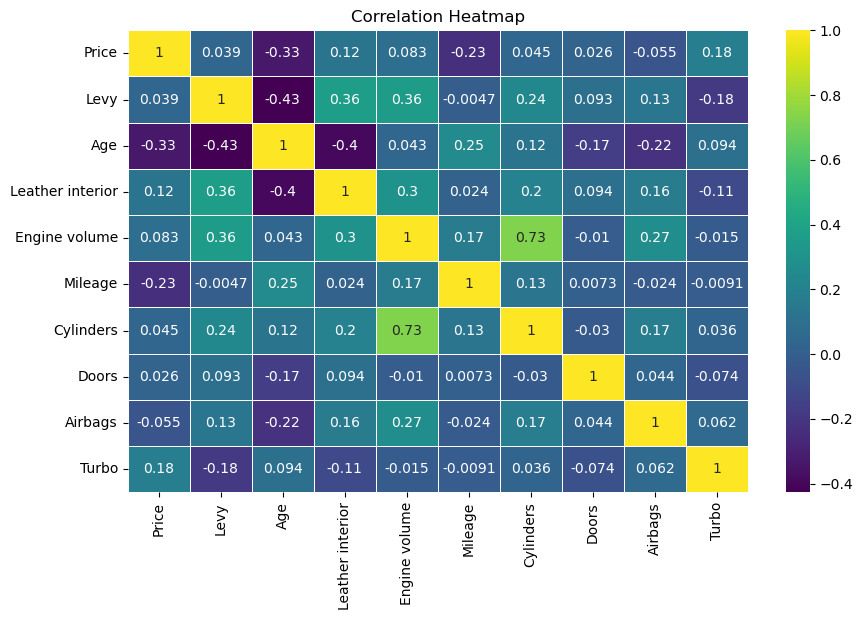

In [68]:
cor= df_clean.select_dtypes(exclude=object).corr()
plt.figure(figsize=(10, 6))
sns.heatmap(cor, annot= True, linewidths= 0.5,cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

如果相关系数的绝对值在0.5以上，我们认为它们有较强的相关性；如果在0.3到0.5之间，我们认为它们有中等程度的相关性；而如果在0.3以下，我们认为它们有弱相关性。

在图中，多数变量与价格的相关性似乎都不是特别强。这并不意味着这些变量对价格没有影响，因为单变量的相关系数无法捕捉到变量之间的可能的复杂交互作用，也可能存在非线性关系，这些都是单纯的相关性分析无法表达的。

In [69]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18846 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18846 non-null  float64
 1   Levy              18846 non-null  float64
 2   Manufacturer      18846 non-null  object 
 3   Model             18846 non-null  object 
 4   Age               18846 non-null  int64  
 5   Category          18846 non-null  object 
 6   Leather interior  18846 non-null  bool   
 7   Fuel type         18846 non-null  object 
 8   Engine volume     18846 non-null  float64
 9   Mileage           18846 non-null  float64
 10  Cylinders         18846 non-null  float64
 11  Gear box type     18846 non-null  object 
 12  Drive wheels      18846 non-null  object 
 13  Doors             18846 non-null  int64  
 14  Wheel             18846 non-null  object 
 15  Color             18846 non-null  object 
 16  Airbags           18846 non-null  int64  
 17

## Model

In [70]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18846 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18846 non-null  float64
 1   Levy              18846 non-null  float64
 2   Manufacturer      18846 non-null  object 
 3   Model             18846 non-null  object 
 4   Age               18846 non-null  int64  
 5   Category          18846 non-null  object 
 6   Leather interior  18846 non-null  bool   
 7   Fuel type         18846 non-null  object 
 8   Engine volume     18846 non-null  float64
 9   Mileage           18846 non-null  float64
 10  Cylinders         18846 non-null  float64
 11  Gear box type     18846 non-null  object 
 12  Drive wheels      18846 non-null  object 
 13  Doors             18846 non-null  int64  
 14  Wheel             18846 non-null  object 
 15  Color             18846 non-null  object 
 16  Airbags           18846 non-null  int64  
 17

In [71]:
df_clean.head()

,Price,Levy,Manufacturer,Model,Age,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,13328.0,1399.0,LEXUS,RX 450,14,Jeep,True,Hybrid,3.5,186005.0,6.0,Automatic,4x4,4,Left wheel,Silver,12,0
1,16621.0,1018.0,CHEVROLET,Equinox,13,Jeep,False,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,4,Left wheel,Black,8,0
2,8467.0,0.0,HONDA,FIT,18,Hatchback,False,Petrol,1.3,200000.0,4.0,Variator,Front,4,Right-hand drive,Black,2,0
3,3607.0,862.0,FORD,Escape,13,Jeep,True,Hybrid,2.5,168966.0,4.0,Automatic,4x4,4,Left wheel,White,0,0
4,11726.0,446.0,HONDA,FIT,10,Hatchback,True,Petrol,1.3,91901.0,4.0,Automatic,Front,4,Left wheel,Silver,4,0


Convert all object columns to numerical by labelencoder (Because ML Model don't understand object columns)

In [72]:
obdata = df_clean.select_dtypes(include=object)
numdata = df_clean.select_dtypes(exclude=object)

In [73]:
label = LabelEncoder()
for i in range(0,obdata.shape[1]):
    obdata.iloc[:,i] = label.fit_transform(obdata.iloc[:,i]) 

In [74]:
df_num = pd.concat([obdata,numdata],axis=1)

In [75]:
df_num

,Manufacturer,Model,Category,Fuel type,Gear box type,Drive wheels,Wheel,Color,Price,Levy,Age,Leather interior,Engine volume,Mileage,Cylinders,Doors,Airbags,Turbo
0,32,1240,4,2,0,0,0,12,13328.0,1399.0,14,True,3.5,186005.0,6.0,4,12,0
1,8,657,4,5,2,0,0,1,16621.0,1018.0,13,False,3.0,192000.0,6.0,4,8,0
2,21,683,3,5,3,1,1,1,8467.0,0.0,18,False,1.3,200000.0,4.0,4,2,0
3,16,660,4,2,0,0,0,14,3607.0,862.0,13,True,2.5,168966.0,4.0,4,0,0
4,21,683,3,5,0,1,0,12,11726.0,446.0,10,True,1.3,91901.0,4.0,4,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,36,384,1,0,1,2,0,12,8467.0,0.0,24,True,2.0,300000.0,4.0,2,5,1
19233,23,1332,9,5,2,1,0,11,15681.0,831.0,13,True,2.4,161600.0,4.0,4,8,0
19234,23,1440,4,1,0,1,0,7,26108.0,836.0,14,True,2.0,116365.0,4.0,4,4,0
19235,8,455,4,1,0,1,0,1,5331.0,1288.0,17,True,2.0,51258.0,4.0,4,4,0


Features Selection and Target

In [76]:
x= df_num.drop(['Price'],axis=1)
y= df_num['Price']

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=5)

In [78]:
algorithm = ['LinearRegression','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingRegressor','SVR']
R2=[]
RMSE = []

In [79]:
def models(model):
    model.fit(x_train,y_train)
    pre = model.predict(x_test)
    r2 = r2_score(y_test,pre)
    rmse = np.sqrt(mean_squared_error(y_test,pre))
    R2.append(r2)
    RMSE.append(rmse)
    score = model.score(x_test,y_test)
    print(f'The Score of Model is :{score}')

In [80]:
m1 = LinearRegression()
m2 = DecisionTreeRegressor()
m3 = RandomForestRegressor()
m4 = GradientBoostingRegressor()
m5 = SVR()
# model6 = xgb.XGBRegressor()

In [81]:
models(m1)
models(m2)
models(m3)
models(m4)
models(m5)

The Score of Model is :0.30554264091147165
The Score of Model is :0.6194726488810168
The Score of Model is :0.803956019061548
The Score of Model is :0.6545844730961012
The Score of Model is :-0.03412780876561183


In [82]:
R = pd.DataFrame({'Algorithm':algorithm, 'R2_score': R2, 'RMSE':RMSE})
R

,Algorithm,R2_score,RMSE
0,LinearRegression,0.305543,11263.826477
1,DecisionTreeClassifier,0.619473,8337.888789
2,RandomForestClassifier,0.803956,5984.665971
3,GradientBoostingRegressor,0.654584,7943.905828
4,SVR,-0.034128,13745.174814


In [83]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# 定义参数网格
param_grid = {
    'n_estimators': [50, 100, 200],   # 树的数量
    'max_depth': [None, 10, 20, 30],  # 树的最大深度
    'min_samples_split': [2, 5, 10],  # 分割内部节点所需的最少样本数
    'min_samples_leaf': [1, 2, 4],    # 在叶节点处需要的最小样本数
    'max_features': ['auto', 'sqrt'], # 寻找最佳分割时要考虑的特征数量
}

# 初始化随机森林回归器
rf = RandomForestRegressor()

# 使用网格搜索进行参数调优
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# 拟合网格搜索
grid_search.fit(x_train, y_train)

# 打印最佳参数组合
print(f"Best parameters: {grid_search.best_params_}")

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10,

/Users/haaland/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, ma

/Users/haaland/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
324 fits failed out of a total of 648.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/haaland/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/haaland/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/haaland/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constraints(
  Fi

Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [84]:
regressor = RandomForestRegressor(
    n_estimators=200, 
    max_depth=30, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    max_features='sqrt'
    
)

models(regressor)

The Score of Model is :0.8058530063884767


In [85]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# 定义要搜索的参数网格
param_grid = {
    'n_estimators': [100, 200, 300],  # 要尝试的树的数量
    'learning_rate': [0.01, 0.1, 0.2],  # 学习率
    'max_depth': [3, 4, 5],  # 树的最大深度
    'min_samples_split': [2, 3],  # 拆分内部节点所需的最小样本数
    'min_samples_leaf': [1, 2],  # 叶节点所需的最小样本数
    'subsample': [0.8, 0.9, 1.0],  # 用于拟合各个基学习器的样本比例
    'max_features': ['sqrt', 'log2', None]  # 寻找最佳分割时要考虑的特征数量
}

# 创建GradientBoostingRegressor模型实例
gbr = GradientBoostingRegressor()

# 设置网格搜索
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# 对训练数据集进行拟合
grid_search.fit(x_train, y_train)

# 打印最佳参数组合
print(f"Best parameters: {grid_search.best_params_}")


Fitting 3 folds for each of 972 candidates, totalling 2916 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_spli

[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, 

[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.2s
[CV] END max_depth=None, 

[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.8s
[CV] END max_depth=None, m

[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None,

[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END max_depth=Non

[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.7s
[CV] END max_depth=None,

[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, m

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.2s
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200, subsample=0.9; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300, subsample=1.0; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=3, max_features=sqr

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   1.5s
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200, subsample=0.9; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.5s
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300, subsample=1.0; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=3, max_features=sqr

[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300, subsample=0.9; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=200, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=300, subsample=0.9; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_lea

[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=300, subsample=0.8; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=200, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=300, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, max_features=log2, min_samples_lea

[CV] END learning_rate=0.01, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200, subsample=1.0; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=300, subsample=1.0; total time=   1.5s
[CV] END learning_rate=0.01, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200, subsample=1.0; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=100, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=100, subsample=0.9; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=200, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=5, max_features=log2, min_samples_lea

[CV] END learning_rate=0.01, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300, subsample=0.8; total time=   1.4s
[CV] END learning_rate=0.01, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=100, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=200, subsample=1.0; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100, subsample=0.9; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200, subsample=0.9; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=5, max_features=log2, min_samples_lea

[CV] END learning_rate=0.01, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, subsample=0.9; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300, subsample=0.8; total time=   1.4s
[CV] END learning_rate=0.01, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=100, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=100, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=300, subsample=0.8; total time=   1.4s
[CV] END learning_rate=0.01, max_depth=5, max_features=log2, min_samples_lea

[CV] END learning_rate=0.01, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=300, subsample=1.0; total time=   1.6s
[CV] END learning_rate=0.01, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200, subsample=0.9; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300, subsample=1.0; total time=   1.5s
[CV] END learning_rate=0.01, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=300, subsample=0.8; total time=   1.4s
[CV] END learning_rate=0.01, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, max_features=log2, min_samples_lea

[CV] END learning_rate=0.01, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=200, subsample=0.8; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=300, subsample=0.8; total time=   1.4s
[CV] END learning_rate=0.01, max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.9; total time=   1.5s
[CV] END learning_rate=0.01, max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200, subsample=1.0; total time=   3.2s
[CV] END learning_rate=0.01, max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300, subsample=1.0; total time=   4.7s
[CV] END learning_rate=0.01, max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=3, n_estimators=300, subsample=0.8; total time=   3.8s
[CV] END learning_rate=0.01, max_depth=5, max_features=None, min_samples_lea

[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=1, mi

[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200, subsample=0.9; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300, subsample=0.9; total time=   0.9s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=1, mi

[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300, subsample=0.8; total time=   0.9s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=200, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=300, subsample=0.9; total time=   0.9s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200, subsample=0.9; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=300, subsample=1.0; total time=   0.8s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=2, mi

Best parameters: {'learning_rate': 0.2, 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 300, 'subsample': 0.9}


In [91]:
regressor_GBR = GradientBoostingRegressor(
    learning_rate = 0.2, 
    max_depth = 5, 
    max_features = None, 
    min_samples_leaf = 1, 
    min_samples_split = 3, 
    n_estimators = 300, 
    subsample = 0.9
)

models(regressor_GBR)

The Score of Model is :0.7803517196684507
